In [1]:
# pip install missingno

In [2]:
# pip install pandas-profiling

In [3]:
import pandas as pd
import requests
import numpy as np
import missingno as msno
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
df = pd.DataFrame(data)

In [5]:
df.head()

timestamp    company level                         title  \
0   6/7/2017 11:33:27     Oracle    L3               Product Manager   
1  6/10/2017 17:11:29       eBay  SE 2             Software Engineer   
2  6/11/2017 14:53:57     Amazon    L7               Product Manager   
3  6/14/2017 21:22:25  Microsoft    64  Software Engineering Manager   
4  6/16/2017 10:44:01     Amazon    L5             Software Engineer   

  totalyearlycompensation               location yearsofexperience  \
0                     127       Redwood City, CA               1.5   
1                     100      San Francisco, CA                 5   
2                     310            Seattle, WA                 8   
3                     200            Redmond, WA                 9   
4                     173  Vancouver, BC, Canada                11   

  yearsatcompany tag basesalary stockgrantvalue  bonus gender otherdetails  \
0            1.5            107              20     10                       
1              3                                                             
2              0            155                                              
3              9         169000          100000  30000                       
4              1         120000               0  53000                       

  cityid dmaid  rowNumber  
0   7392   807          1  
1   7419   807          2  
2  11527   819          3  
3  11521   819          5  
4   1320     0          6

In [6]:
df = df.drop(['cityid', 'dmaid','rowNumber'], axis=1)
df = df.replace("", np.nan)

In [7]:
df.isnull().sum()

timestamp                      0
company                        0
level                          0
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          786
basesalary                  2304
stockgrantvalue             2684
bonus                       3988
gender                     19540
otherdetails               22503
dtype: int64

# MISSINGNO Exploring
[missingo](https://github.com/ResidentMario/missingno) is new to me, so let's play around with it! 


<AxesSubplot:>

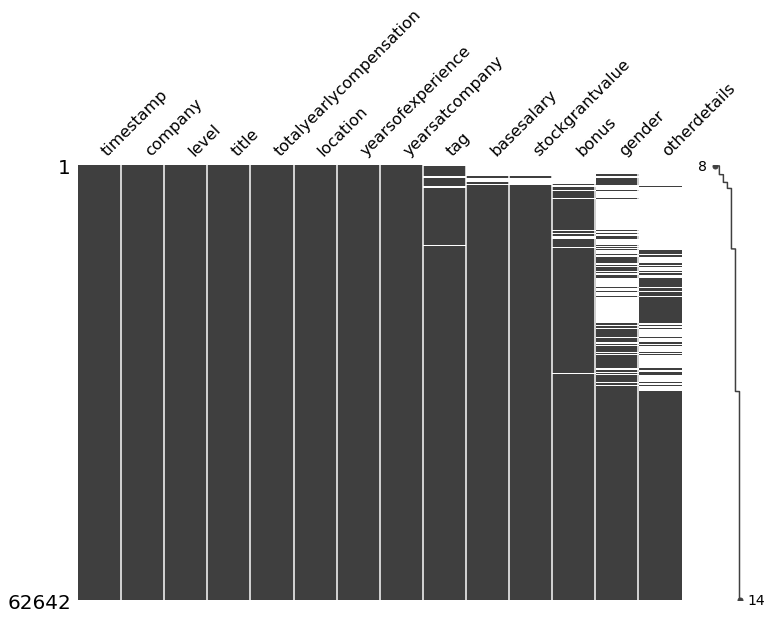

In [8]:
#matrix to visualize missing data patterns:
msno.matrix(df, sort='ascending', figsize=(12, 8))

/opt/anaconda3/lib/python3.8/site-packages/missingno/missingno.py:265: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


<AxesSubplot:>

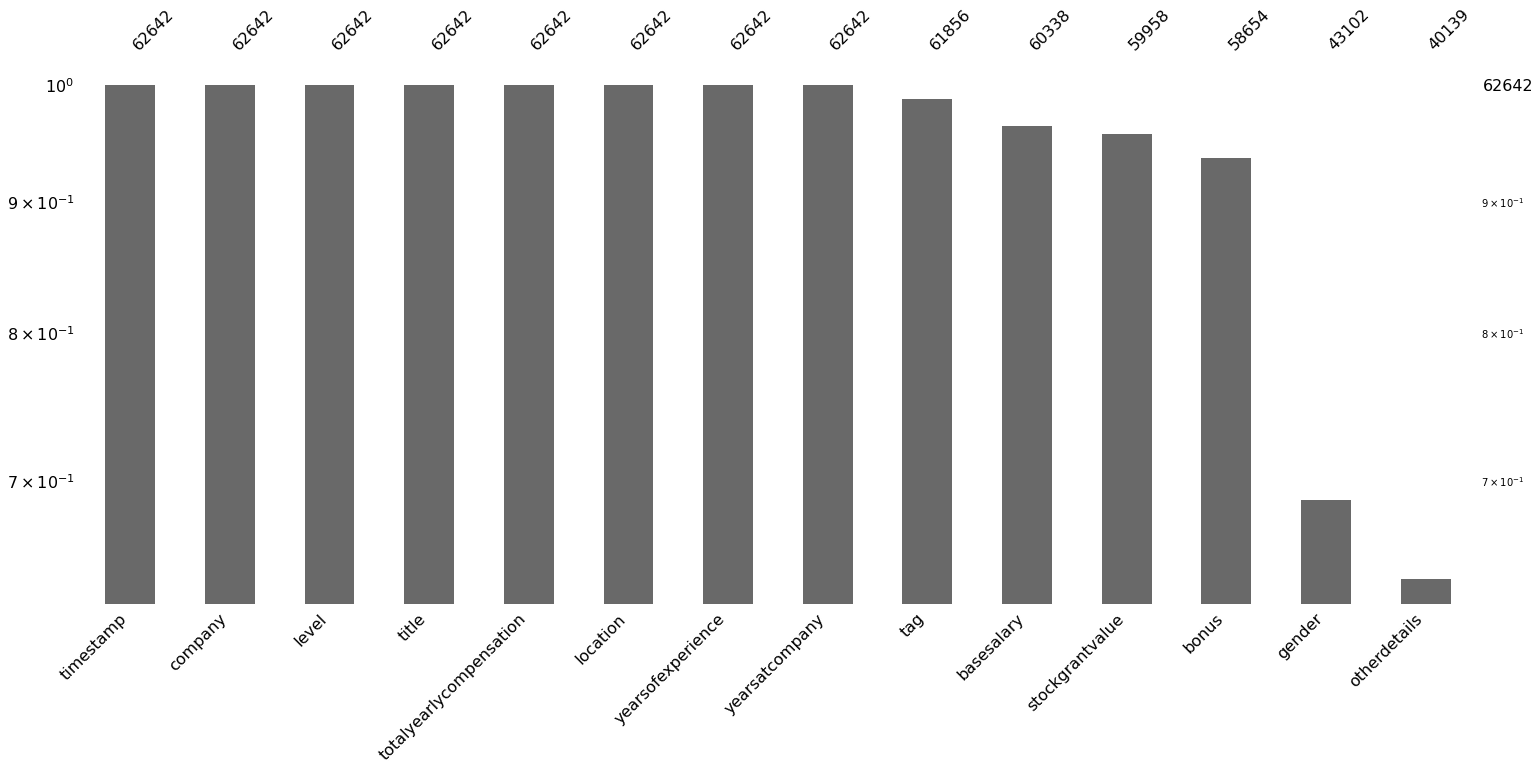

In [9]:
#simplier way to visualize missing data: 
msno.bar(df, log=True)

<AxesSubplot:>

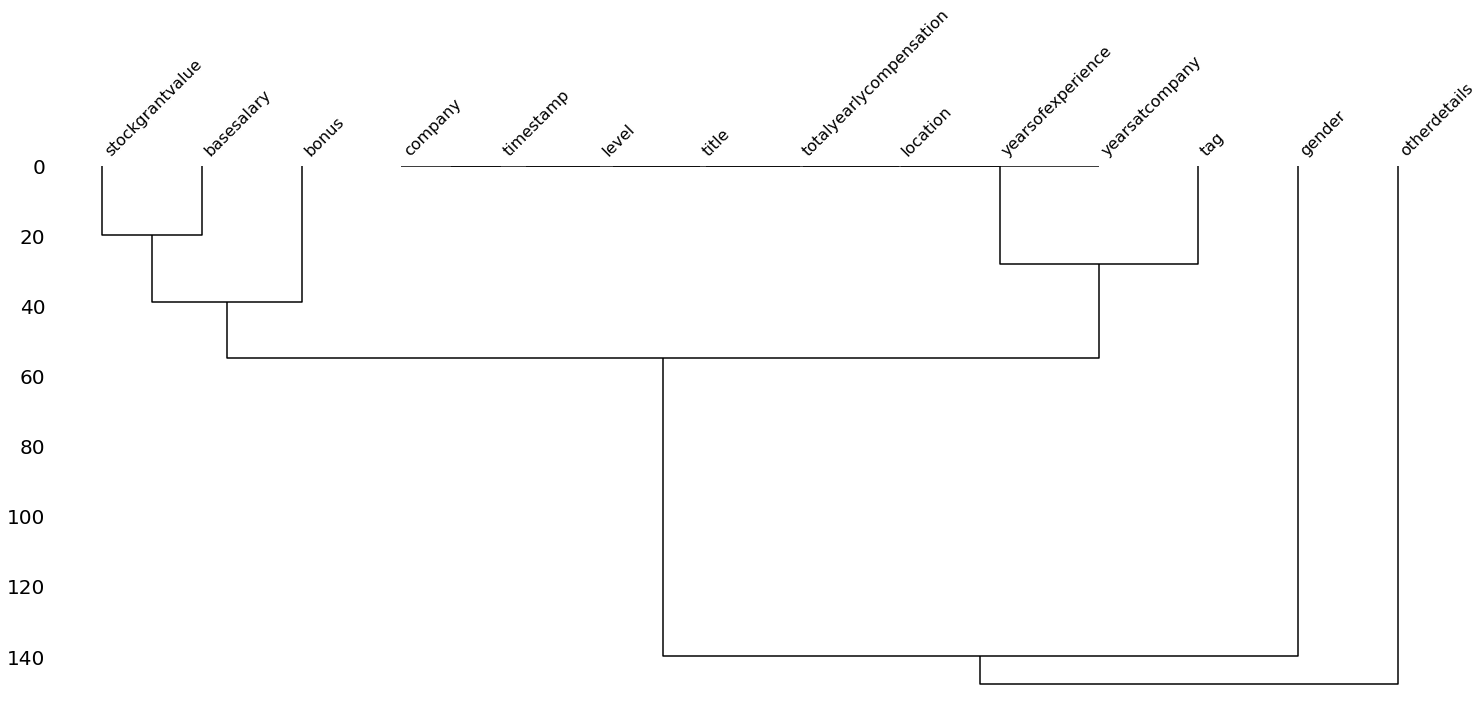

In [10]:
#https://github.com/ResidentMario/missingno#dendrogram
msno.dendrogram(df)

In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df[['yearsofexperience','basesalary','bonus',
    'stockgrantvalue','totalyearlycompensation',
    'yearsatcompany']] = df[['yearsofexperience',
    'basesalary','bonus',
    'stockgrantvalue','totalyearlycompensation',
    'yearsatcompany']].apply(pd.to_numeric)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                62642 non-null  datetime64[ns]
 1   company                  62642 non-null  object        
 2   level                    62642 non-null  object        
 3   title                    62642 non-null  object        
 4   totalyearlycompensation  62642 non-null  float64       
 5   location                 62642 non-null  object        
 6   yearsofexperience        62642 non-null  float64       
 7   yearsatcompany           62642 non-null  float64       
 8   tag                      61856 non-null  object        
 9   basesalary               60338 non-null  float64       
 10  stockgrantvalue          59958 non-null  float64       
 11  bonus                    58654 non-null  float64       
 12  gender                   43102 n

In [13]:
df.profile_report()

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


In [14]:
#Remove outliers from totalyearlycompensation: 

df = df[df['totalyearlycompensation'].between(df['totalyearlycompensation'].quantile(.05),df['totalyearlycompensation'].quantile(.95))]

In [39]:
df.head()

timestamp    company level                         title  \
0 2017-06-07 11:33:27     Oracle    L3               Product Manager   
1 2017-06-10 17:11:29       eBay  SE 2             Software Engineer   
2 2017-06-11 14:53:57     Amazon    L7               Product Manager   
3 2017-06-14 21:22:25  Microsoft    64  Software Engineering Manager   
4 2017-06-16 10:44:01     Amazon    L5             Software Engineer   

   totalyearlycompensation               location  yearsofexperience  \
0                    127.0       Redwood City, CA                1.5   
1                    100.0      San Francisco, CA                5.0   
2                    310.0            Seattle, WA                8.0   
3                    200.0            Redmond, WA                9.0   
4                    173.0  Vancouver, BC, Canada               11.0   

   yearsatcompany  tag  basesalary  stockgrantvalue    bonus gender  \
0             1.5  NaN       107.0             20.0     10.0    NaN   
1             3.0  NaN         NaN              NaN      NaN    NaN   
2             0.0  NaN       155.0              NaN      NaN    NaN   
3             9.0  NaN    169000.0         100000.0  30000.0    NaN   
4             1.0  NaN    120000.0              0.0  53000.0    NaN   

  otherdetails  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [16]:
#Profile Report for FAANG compaines only:
#df.query("company in ('Facebook','Amazon','Apple','Netflix','Google') and title in ('Product Manager','Software Engineer') and yearsofexperience>4 and yearsofexperience<16").profile_report()

## Thoughts on Pandas Profiling: 
This is a pretty neat way to summarize data, I could see this being useful for presenting to a non-technical audience in a format that's not code outputs. 

It is, however, a LOT of info and maybe too much if you're trying to just get a snapshot of a slice of data. Like Above, you can 'zoom' in on categories you're interested in, it's still a lot of info that you have to wade through.

I can see the usefullness for very large datasets, it's a simple one-line code that helps visualize and summarize aspects of the data. I will read the documentation to see if there's ways to zoom in on specifics and omit peices of this report that aren't relevant.  

In [17]:
#curious what the top 10 companies are in terms of #s of reports
df['company'].value_counts().head(10)


Amazon        7513
Microsoft     4822
Google        3847
Facebook      2424
Apple         1855
Oracle         959
Salesforce     940
Intel          897
IBM            830
Cisco          828
Name: company, dtype: int64

Text(0.5, 0, 'Company')

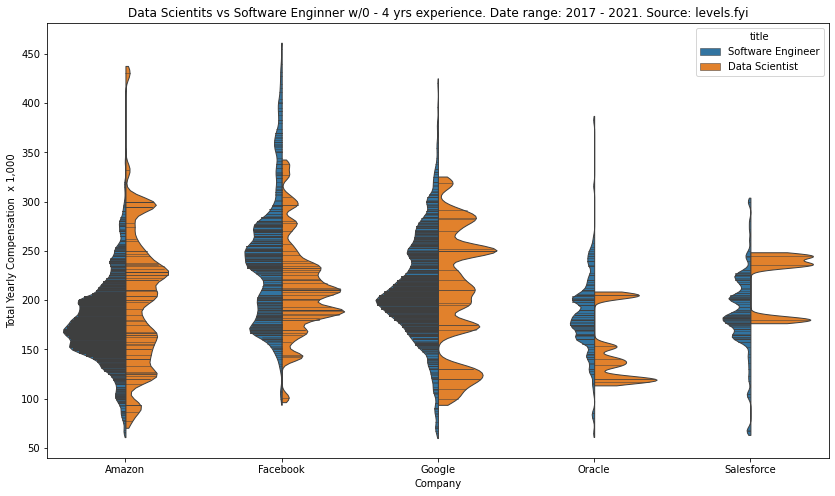

In [18]:
#advanced visualization to transform the data and graph in a violin plot

companies = df.query("company in ('Facebook','Amazon','Oracle','Google', 'Salesforce') and title in ('Data Scientist','Software Engineer') and yearsofexperience>0 and yearsofexperience<4")

plt.figure(figsize=(14, 8))

g=sns.violinplot(data=companies, split = True, x='company',hue='title',y='totalyearlycompensation',
                   inner='stick', bw=.1, cut=1, linewidth=1)


plt.title('Data Scientits vs Software Enginner w/0 - 4 yrs experience. Date range: 2017 - 2021. Source: levels.fyi')
plt.ylabel('Total Yearly Compensation  x 1,000')
plt.xlabel('Company')

# faang = df.query("company in ('Facebook','Amazon','Apple','Netflix','Google') and title in ('Product Manager','Software Engineer') and yearsofexperience>4 and yearsofexperience<16")

# plt.figure(figsize=(14, 8))
# sns.violinplot(data=faang, palette="Set3", split = True, x='company',hue='title',y='totalyearlycompensation',
#                    inner='stick', bw=.1, cut=1, linewidth=1)



Matt Grierson's blog used a library called AutoViz, which uses XGBoost
    "to determine the most consistent set of features determined to be important by using a random set of features each time; the most prominent selected features can then serve to guide future plotting and visualization"
I could not get the library to install, yet. But I figured I could manage some similar visualizations with Seaborn: 

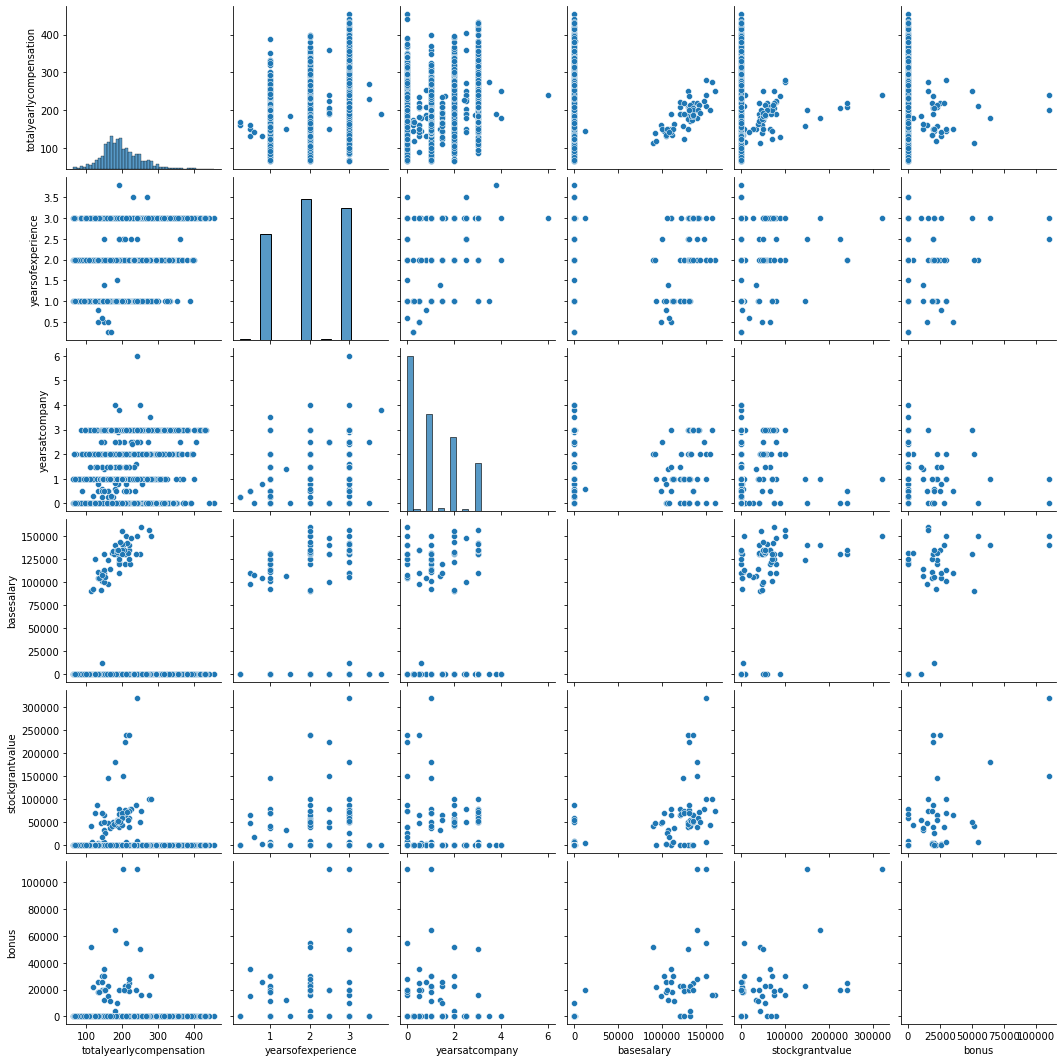

In [44]:
sns.pairplot(companies)